# TEINE KODUTÖÖ

### Andmete lugemine

In [170]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

toidud = pd.read_csv("toidud.csv", header=0)
#eemaldame ennustatavad veeru
X = toidud.drop(['Toidu nimetus', 'Valmistamise keerukus (1-5)', 'Valmistamise aeg minutites'], axis=1)
y = toidud['Valmistamise keerukus (1-5)']
y_ = toidud['Valmistamise aeg minutites']

ahi = 'Ei'
portsjoneid = 2
vegan = 'Ei'
taimetoit = 'Ei'
gluteenivaba = 'Ei'
laktoosivaba = 'Ei'
loomaliha = 'Jah'
sealiha = 'Ei'
kanaliha = 'Ei'
kala = 'Ei'

Z = {'Vajab kuumtöötlemist': [ahi], 
     'Portsjoneid': [portsjoneid], 
     'Vegan': [vegan], 
     'Taimetoit': [taimetoit], 
     'Gluteenivaba': [gluteenivaba], 
     'Laktoosivaba': [laktoosivaba], 
     'Loomaliha': [loomaliha], 
     'Sealiha': [sealiha], 
     'Kanaliha': [kanaliha], 
     'Kala/mereannid': [kala]}
Z = pd.DataFrame(data=Z)

jah_ei_map = {"Ei": 0, "Jah": 1}

X["Vajab kuumtöötlemist"] = X["Vajab kuumtöötlemist"].map(jah_ei_map)
X["Vegan"] = X["Vegan"].map(jah_ei_map)
X["Taimetoit"] = X["Taimetoit"].map(jah_ei_map)
X["Gluteenivaba"] = X["Gluteenivaba"].map(jah_ei_map)
X["Laktoosivaba"] = X["Laktoosivaba"].map(jah_ei_map)
X["Loomaliha"] = X["Loomaliha"].map(jah_ei_map)
X["Sealiha"] = X["Sealiha"].map(jah_ei_map)
X["Kanaliha"] = X["Kanaliha"].map(jah_ei_map)
X["Kala/mereannid"] = X["Kala/mereannid"].map(jah_ei_map)

Z["Vajab kuumtöötlemist"] = Z["Vajab kuumtöötlemist"].map(jah_ei_map)
Z["Vegan"] = Z["Vegan"].map(jah_ei_map)
Z["Taimetoit"] = Z["Taimetoit"].map(jah_ei_map)
Z["Gluteenivaba"] = Z["Gluteenivaba"].map(jah_ei_map)
Z["Laktoosivaba"] = Z["Laktoosivaba"].map(jah_ei_map)
Z["Loomaliha"] = Z["Loomaliha"].map(jah_ei_map)
Z["Sealiha"] = Z["Sealiha"].map(jah_ei_map)
Z["Kanaliha"] = Z["Kanaliha"].map(jah_ei_map)
Z["Kala/mereannid"] = Z["Kala/mereannid"].map(jah_ei_map)

X.head()

,Vajab kuumtöötlemist,Portsjoneid,Vegan,Taimetoit,Gluteenivaba,Laktoosivaba,Loomaliha,Sealiha,Kanaliha,Kala/mereannid
0,0,2,0,1,0,0,0,0,0,0
1,0,4,1,1,1,1,0,0,0,0
2,1,2,0,1,0,0,0,0,0,0
3,1,3,0,0,0,0,0,1,0,0
4,1,6,0,0,0,1,1,0,0,0


### Analüüs

In [165]:
toidud.describe()

,Nimi,Valmistamise keerukus (1-5),Valmistamise aeg minutites,Portsjoneid
count,70.000000,70.000000,70.000000,70.000000
mean,35.500000,3.342857,35.142857,5.057143
std,20.351085,0.991057,29.610655,2.691294
min,1.000000,1.000000,5.000000,1.000000
25%,18.250000,3.000000,20.000000,4.000000
50%,35.500000,3.000000,27.500000,4.000000
75%,52.750000,4.000000,40.000000,6.000000
max,70.000000,5.000000,160.000000,16.000000


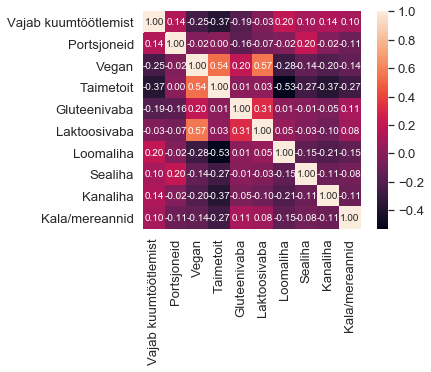

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = X.columns.values
df_simple = X[cols]
cm = np.corrcoef(df_simple.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)

### Keerukuse ennustamine

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

pipe_lr = Pipeline([('sc1', StandardScaler()), ('clf', LogisticRegression())])
pipe_lr.fit(X_train, y_train)

pipe_p = Pipeline([('sc1', StandardScaler()), ('p', Perceptron(max_iter=40, eta0=0.1, random_state=0))])
pipe_p.fit(X_train, y_train)

pipe_dt = Pipeline([('sc1', StandardScaler()), ('dt', DecisionTreeClassifier())])
pipe_dt.fit(X_train, y_train)

pipe_kn = Pipeline([('sc1', StandardScaler()), ('kn', KNeighborsClassifier())])
pipe_kn.fit(X_train, y_train)

pipe_svc = Pipeline([('sc1', StandardScaler()), ('svc', SVC())])
pipe_svc.fit(X_train, y_train)

clf_scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=5, n_jobs=1)
p_scores = cross_val_score(estimator=pipe_p, X=X_train, y=y_train, cv=5, n_jobs=1)
dt_scores = cross_val_score(estimator=pipe_dt, X=X_train, y=y_train, cv=5, n_jobs=1)
kn_scores = cross_val_score(estimator=pipe_kn, X=X_train, y=y_train, cv=5, n_jobs=1)
svc_scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=5, n_jobs=1)

print('CV keskmised täpsused:')
print('Logistiline regressioon: %.3f' % np.mean(clf_scores), "+/- %.3f" % np.std(clf_scores), ' ennustatav keerukus: ', pipe_lr.predict(Z))
print('Närvivõrk: %.3f' % np.mean(p_scores), "+/- %.3f" % np.std(p_scores), ' ennustatav keerukus: ', pipe_p.predict(Z))
print('Otsustuspuu: %.3f' % np.mean(dt_scores), "+/- %.3f" % np.std(dt_scores), ' ennustatav keerukus: ', pipe_dt.predict(Z))
print('KNeighborsClassifier: %.3f' % np.mean(kn_scores), "+/- %.3f" % np.std(kn_scores), ' ennustatav keerukus: ', pipe_kn.predict(Z))
print('SVC: %.3f' % np.mean(svc_scores), "+/- %.3f" % np.std(svc_scores), ' ennustatav keerukus: ', pipe_svc.predict(Z))

keerukus = pipe_kn.predict(Z)[0]

CV keskmised täpsused:
Logistiline regressioon: 0.389 +/- 0.048  ennustatav keerukus:  [3]
Närvivõrk: 0.327 +/- 0.074  ennustatav keerukus:  [3]
Otsustuspuu: 0.331 +/- 0.149  ennustatav keerukus:  [2]
KNeighborsClassifier: 0.451 +/- 0.065  ennustatav keerukus:  [3]
SVC: 0.493 +/- 0.116  ennustatav keerukus:  [3]


Kõige parema tulemuse annab KNeighborsClassifier (hea tulemus ja väike hälve)

### Aja ennustamine

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3)

pipe_lr = Pipeline([('sc1', StandardScaler()), ('clf', LogisticRegression())])
pipe_lr.fit(X_train, y_train)

pipe_p = Pipeline([('sc1', StandardScaler()), ('p', Perceptron(max_iter=40, eta0=0.1, random_state=0))])
pipe_p.fit(X_train, y_train)

pipe_dt = Pipeline([('sc1', StandardScaler()), ('dt', DecisionTreeClassifier())])
pipe_dt.fit(X_train, y_train)

pipe_kn = Pipeline([('sc1', StandardScaler()), ('kn', KNeighborsClassifier())])
pipe_kn.fit(X_train, y_train)

pipe_svc = Pipeline([('sc1', StandardScaler()), ('svc', SVC())])
pipe_svc.fit(X_train, y_train)

clf_scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=5, n_jobs=1)
p_scores = cross_val_score(estimator=pipe_p, X=X_train, y=y_train, cv=5, n_jobs=1)
dt_scores = cross_val_score(estimator=pipe_dt, X=X_train, y=y_train, cv=5, n_jobs=1)
kn_scores = cross_val_score(estimator=pipe_kn, X=X_train, y=y_train, cv=5, n_jobs=1)
svc_scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=5, n_jobs=1)

print('CV keskmised täpsused:')
print('Logistiline regressioon: %.3f' % np.mean(clf_scores), "+/- %.3f" % np.std(clf_scores), ' ennustatav aeg: ', pipe_lr.predict(Z))
print('Närvivõrk: %.3f' % np.mean(p_scores), "+/- %.3f" % np.std(p_scores), ' ennustatav aeg: ', pipe_p.predict(Z))
print('Otsustuspuu: %.3f' % np.mean(dt_scores), "+/- %.3f" % np.std(dt_scores), ' ennustatav aeg: ', pipe_dt.predict(Z))
print('KNeighborsClassifier: %.3f' % np.mean(kn_scores), "+/- %.3f" % np.std(kn_scores), ' ennustatav aeg: ', pipe_kn.predict(Z))
print('SVC: %.3f' % np.mean(svc_scores), "+/- %.3f" % np.std(svc_scores), ' ennustatav aeg: ', pipe_svc.predict(Z))

aeg = pipe_kn.predict(Z)[0]

CV keskmised täpsused:
Logistiline regressioon: 0.222 +/- 0.071  ennustatav aeg:  [20]
Närvivõrk: 0.242 +/- 0.076  ennustatav aeg:  [5]
Otsustuspuu: 0.262 +/- 0.160  ennustatav aeg:  [5]
KNeighborsClassifier: 0.284 +/- 0.114  ennustatav aeg:  [20]
SVC: 0.264 +/- 0.100  ennustatav aeg:  [20]


Kõige parema tulemuse annab KNeighborsClassifier (hea tulemus ja väike hälve)

### Toitude filtreerimine

In [169]:
df = pd.DataFrame(data=toidud)
print('Ennustatud toidu valmistamise aeg kuni', aeg, ' minutit')
print('Ennustatud toidu valmistamise keerukus skaalal 1-5 kuni', keerukus)

df = df.loc[(df['Portsjoneid'] >= portsjoneid)]

if (vegan == 'Jah'):
    df = df.loc[(df['Vegan'] == vegan)]
    
if (taimetoit == 'Jah'):
    df = df.loc[(df['Taimetoit'] == taimetoit)]
    
if (ahi == 'Jah'):
    df = df.loc[(df['Vajab kuumtöötlemist'] == ahi)]
    
if (gluteenivaba == 'Jah'):
    df = df.loc[(df['Gluteenivaba'] == gluteenivaba)]
    
if (laktoosivaba == 'Jah'):
    df = df.loc[(df['Laktoosivaba'] == laktoosivaba)]
    
if (loomaliha == 'Ei'):
    df = df.loc[(df['Loomaliha'] == loomaliha)]
    
if (sealiha == 'Ei'):
    df = df.loc[(df['Sealiha'] == sealiha)]
    
if (kanaliha == 'Ei'):
    df = df.loc[(df['Kanaliha'] == kanaliha)]
    
if (kala == 'Ei'):
    df = df.loc[(df['Kala/mereannid'] == kala)]
    
    
#Leia kõige lähedasem saadaolev aeg ennustatud ajale ning filtreeri
lähim_aeg = 1000
lähim_vahe = 1000
for valmistamise_aeg in df['Valmistamise aeg minutites']:
    if abs(valmistamise_aeg-aeg) < lähim_vahe:
        lähim_aeg = valmistamise_aeg
        lähim_vahe = abs(valmistamise_aeg-aeg) 
        
df = df.loc[(df['Valmistamise aeg minutites'] <= lähim_aeg)]
df2 = df.loc[(df['Valmistamise keerukus (1-5)'] <= keerukus)]

#Arvesta keerukusega ainult siis, kui on reaalselt mõni selle keerukusega toit saadaval
if (df2.size > 0):
    df = df.loc[(df['Valmistamise keerukus (1-5)'] <= keerukus)]

print('\nSobivad toidud:')
for toit in df['Toidu nimetus']:
    print(toit)

Ennustatud toidu valmistamise aeg kuni 20  minutit
Ennustatud toidu valmistamise keerukus skaalal 1-5 kuni 3

Sobivad toidud:
Juustusai
Värske salat
Kaerahelbepuder
Makaronid hakklihaga
Seljanka
Läätsesupp
Aedviljakarri
Pasta Bolognese
Pannkoogid
Omlett köögiviljadega
Soe oasalat
Arbuusipitsa kohupiimaga
Karjusevorm
Hernesupp
Kreeka salat
Waldorfi salat
Paprika-fenkolisalat
Kaalika-puuviljasalat
Muna-sibulasalat
